In [1]:
pip install split-folders


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D , Flatten , MaxPool2D , Dropout , GlobalAveragePooling2D , Dense
from tensorflow.keras import layers , models
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import splitfolders
import matplotlib.image as mpimg

In [4]:
os.listdir("/kaggle/input/cat-and-dog/training_set/training_set")

['dogs', 'cats']

In [5]:
path = "/kaggle/input/cat-and-dog/training_set/training_set"
for folder in os.listdir(path):
    folder_path = os.path.join(path,folder)
    if os.path.isdir(folder_path):
        list_of_elements = os.listdir(os.path.join(path,folder))
        
        print(f"folder:{folder}")
        print(f"number of elements:{len(list_of_elements)}")
        
    else:
        print(f"{folder_path} is not a directory")

folder:dogs
number of elements:4006
folder:cats
number of elements:4001


In [6]:
path_cats = "/kaggle/input/cat-and-dog/training_set/training_set/cats"
path_dogs ="/kaggle/input/cat-and-dog/training_set/training_set/dogs"

In [7]:
def plot_imgs(item_dir,num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir,file) for file in all_item_dirs][:num_imgs]
    
    plt.figure(figsize=(10,10))
    for idx ,img_path in enumerate (item_files):
        plt.subplot(5,5,idx+1)
        img = plt.imread(img_path)
        plt.imshow(img)
        
    plt.tight_layout()

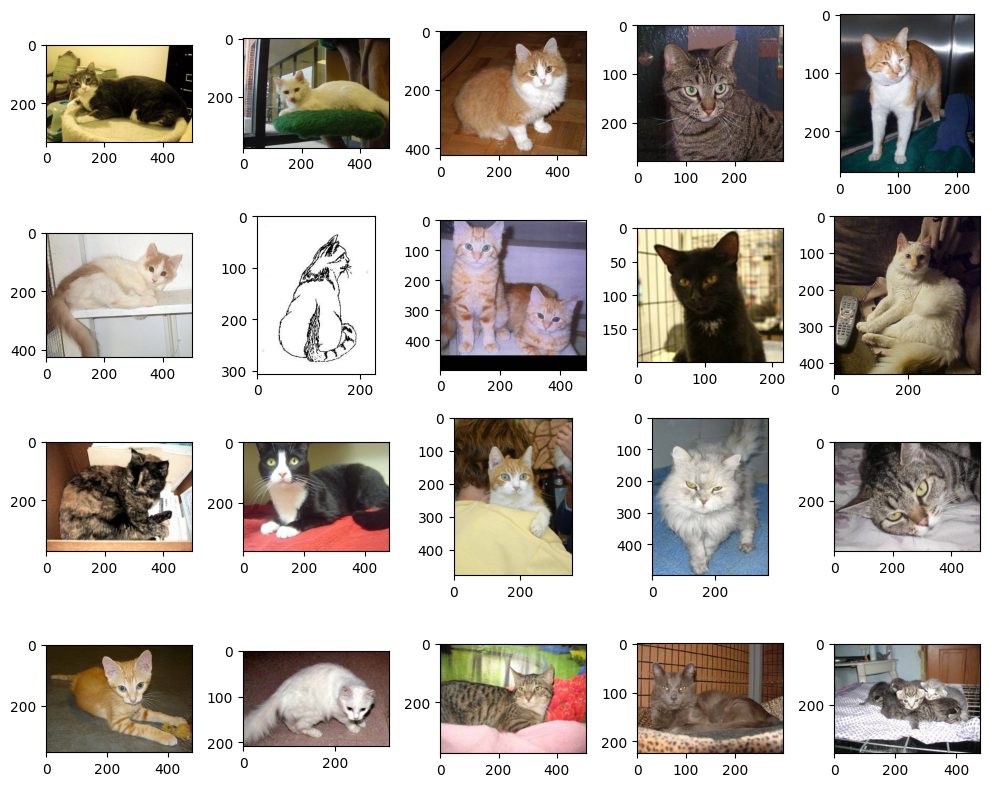

In [8]:
plot_imgs(path_cats , 20)

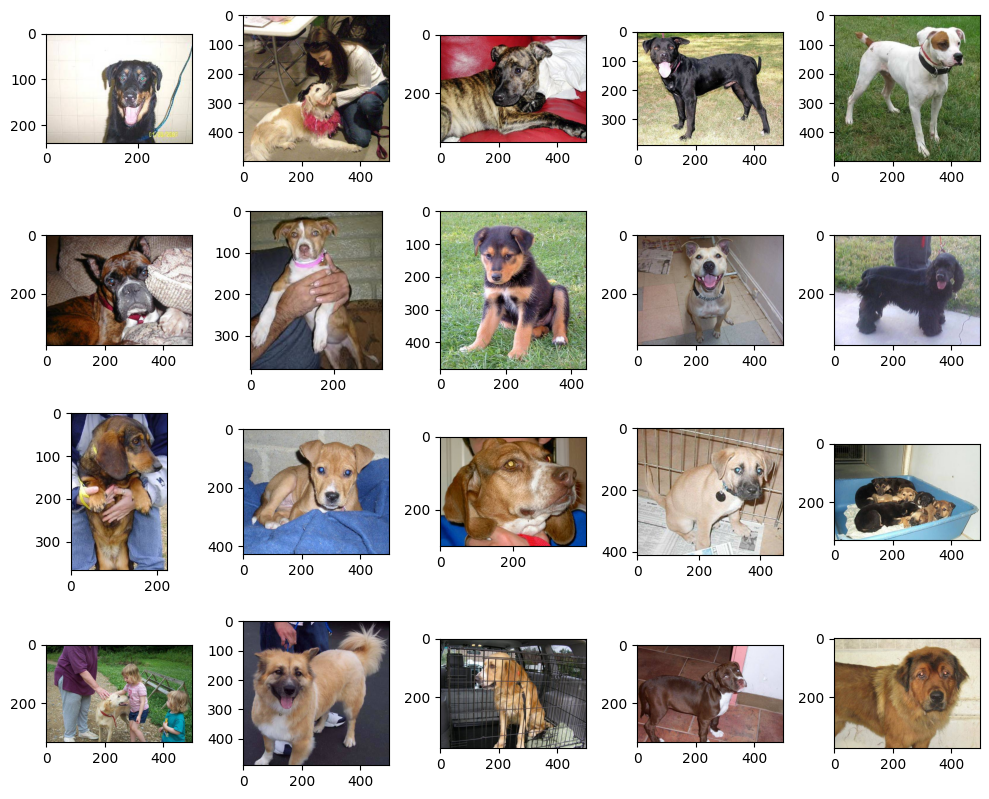

In [9]:
plot_imgs(path_dogs ,20)

In [10]:
splitfolders.ratio("/kaggle/input/cat-and-dog/training_set/training_set",
                  output="data",
                  seed=7,
                  ratio=(0.8,0.1,0.1))

Copying files: 8007 files [00:45, 174.69 files/s]


In [11]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  fill_mode="nearest")



test_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  fill_mode="nearest")


valid_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  fill_mode="nearest")

In [12]:
train = train_datagen.flow_from_directory("data/train",
                                         target_size=(150,150),
                                         class_mode="categorical",
                                         batch_size=32,
                                         color_mode="rgb")

test = test_datagen.flow_from_directory("data/test",
                                       target_size=(150,150),
                                       class_mode="categorical",
                                       batch_size=32,
                                       color_mode="rgb")

valid = valid_datagen.flow_from_directory("data/val",
                                         target_size=(150,150),
                                         class_mode="categorical",
                                         batch_size=32,
                                         color_mode="rgb")

Found 6404 images belonging to 2 classes.
Found 801 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [13]:
resnet_model = ResNet50(weights = "imagenet",
                       include_top=False,
                       input_shape=(150,150,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
for layer in resnet_model.layers:
    layer.trainable = True

In [15]:
x=resnet_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation="relu")(x)
x=Dropout(0.5)(x)
#x=Dense(256,activation="relu")(x)
#x=Dropout(0.5)(x)
predictions = Dense(2,activation="softmax")(x)

In [16]:
model = Model(inputs=resnet_model.input , outputs=predictions)
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [17]:
history = model.fit(train,
                   validation_data=valid,
                   steps_per_epoch=5,
                   epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6438 - loss: 0.7701 - val_accuracy: 0.5000 - val_loss: 5.1154
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7773 - loss: 0.6175 - val_accuracy: 0.5000 - val_loss: 50.1188
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7877 - loss: 0.4674 - val_accuracy: 0.5000 - val_loss: 842.0341
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7543 - loss: 0.7048 - val_accuracy: 0.5000 - val_loss: 58.2311
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7423 - loss: 0.7845 - val_accuracy: 0.5000 - val_loss: 176.3698
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7516 - loss: 0.7450 - val_accuracy: 0.5000 - val_loss: 1069435.0000
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5841 - loss: 1.3882 - val_accuracy: 0.5000 - val_loss: 4151524.7500
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6546 - loss: 0.9103 - val_accuracy: 0.5000 - val_loss: 64902504.0000
E

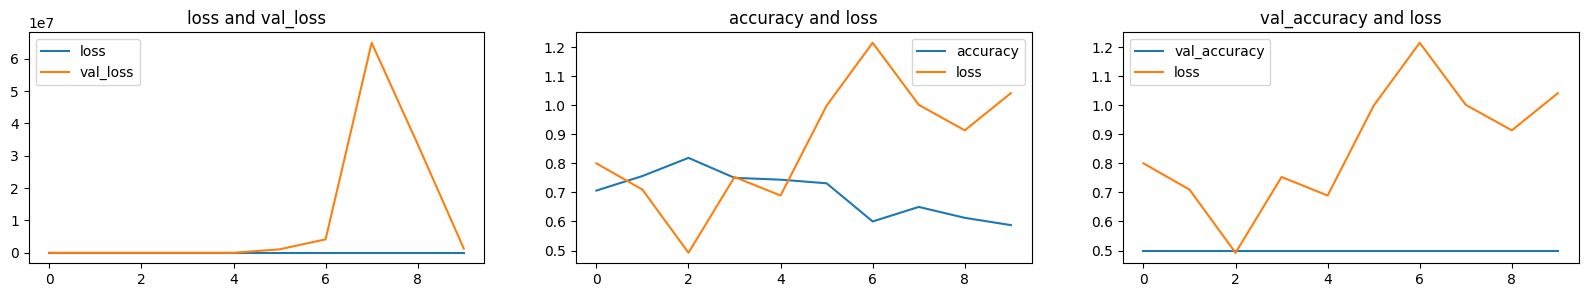

In [18]:
plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
plt.plot(history.history["loss"] , label="loss")
plt.plot(history.history["val_loss"] , label="val_loss")
plt.legend()
plt.title("loss and val_loss")


plt.subplot(1,3,2)
plt.plot(history.history["accuracy"] , label="accuracy")
plt.plot(history.history["loss"] , label="loss")
plt.legend()
plt.title("accuracy and loss")


plt.subplot(1,3,3)
plt.plot(history.history["val_accuracy"] , label="val_accuracy")
plt.plot(history.history["loss"] , label="loss")
plt.legend()
plt.title("val_accuracy and loss")
plt.show()